# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline
import json

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
requests.get(btc_url)
btc_data = requests.get(btc_url)
btc_content = btc_data.content
print(btc_content)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 19404993,\n\t\t\t"total_supply": 19404993,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 26490.0000000000000000,\n\t\t\t\t\t"volume_24h": 7666719569,\n\t\t\t\t\t"market_cap": 514278932028,\n\t\t\t\t\t"percentage_change_1h": -0.0467559224541096,\n\t\t\t\t\t"percentage_change_24h": 0.4758956741837980,\n\t\t\t\t\t"percentage_change_7d": 3.2564918432406800,\n\t\t\t\t\t"percent_change_1h": -0.0467559224541096,\n\t\t\t\t\t"percent_change_24h": 0.4758956741837980,\n\t\t\t\t\t"percent_change_7d": 3.2564918432406800\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1687031700\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1687031700,\n\t\t"num_cryptocurrencies": 3119,\n\t\t"error": null\n\t}\n}'


In [6]:
# Fetch current ETH price
requests.get(eth_url)
eth_data = requests.get(eth_url)
eth_content = eth_data.content
print(eth_content)

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 120212803,\n\t\t\t"total_supply": 120212803,\n\t\t\t"max_supply": 120212803,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 1727.2100000000000000,\n\t\t\t\t\t"volume_24h": 5670032605,\n\t\t\t\t\t"market_cap": 207665948915,\n\t\t\t\t\t"percentage_change_1h": -0.1634511761433850,\n\t\t\t\t\t"percentage_change_24h": 0.4446940041225370,\n\t\t\t\t\t"percentage_change_7d": -0.7895944660286750,\n\t\t\t\t\t"percent_change_1h": -0.1634511761433850,\n\t\t\t\t\t"percent_change_24h": 0.4446940041225370,\n\t\t\t\t\t"percent_change_7d": -0.7895944660286750\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1687031692\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1687031692,\n\t\t"num_cryptocurrencies": 3119,\n\t\t"error": null\n\t}\n}'


In [7]:
btc_dump = btc_data.json()
print(json.dumps(btc_dump, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19404993,
            "total_supply": 19404993,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 26490.0,
                    "volume_24h": 7666719569,
                    "market_cap": 514278932028,
                    "percentage_change_1h": -0.0467559224541096,
                    "percentage_change_24h": 0.475895674183798,
                    "percentage_change_7d": 3.25649184324068,
                    "percent_change_1h": -0.0467559224541096,
                    "percent_change_24h": 0.475895674183798,
                    "percent_change_7d": 3.25649184324068
                }
            },
            "last_updated": 1687031700
        }
    },
    "metadata": {
        "timestamp": 1687031700,
        "num_cr

In [8]:
eth_dump = eth_data.json()
print(json.dumps(eth_dump, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120212803,
            "total_supply": 120212803,
            "max_supply": 120212803,
            "quotes": {
                "USD": {
                    "price": 1727.21,
                    "volume_24h": 5670032605,
                    "market_cap": 207665948915,
                    "percentage_change_1h": -0.163451176143385,
                    "percentage_change_24h": 0.444694004122537,
                    "percentage_change_7d": -0.789594466028675,
                    "percent_change_1h": -0.163451176143385,
                    "percent_change_24h": 0.444694004122537,
                    "percent_change_7d": -0.789594466028675
                }
            },
            "last_updated": 1687031692
        }
    },
    "metadata": {
        "timestamp": 1687031692,
  

In [9]:
# Compute current value of my crpto
my_btc_value = btc_dump['data']['1']['quotes']['USD']['price']
my_eth_value = eth_dump['data']['1027']['quotes']['USD']['price']
print(str(my_btc_value))
print(str(my_eth_value))

26490.0
1727.21


In [10]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $26490.00
The current value of your 5.3 ETH is $1727.21


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [13]:
# Format current date as ISO format
today = pd.Timestamp("2023-06-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                              \
                            open    high     low  close   volume trade_count   
timestamp                                                                      
2023-06-16 04:00:00+00:00  98.09  98.275  97.905  98.14  4599777       26718   

                                         SPY                            \
                                vwap    open      high     low   close   
timestamp                                                                
2023-06-16 04:00:00+00:00  98.118495  443.02  443.6078  438.97  439.46   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2023-06-16 04:00:00+00:00  110461387      619074  440.999282

In [14]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.14
Current SPY closing price: $439.46


In [15]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21973.00
The current value of your 200 AGG shares is $19628.00


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = {
    'savings': [19385.986877, 40616.500000]
}
tickers = ['crypto', 'shares']

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, index=tickers)

# Display savings DataFrame
display(df_savings)

savings
crypto  19385.986877
shares  40616.500000

<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='savings'>

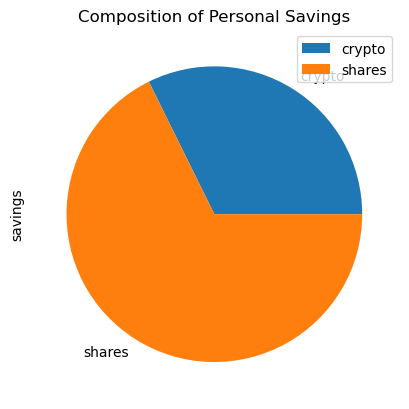

In [17]:
# Plot savings pie chart
df_savings.plot.pie(
    y='savings',
    title='Composition of Personal Savings'
)

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)
# Calculate total amount of savings
total_savings = df_savings.sum()
print(total_savings)

36000
savings    60002.486877
dtype: float64


In [42]:
# Validate saving health
if total_savings.sum() > emergency_fund:
    print(f'Congratulations! Your emergency fund is looking good!')
elif total_savings.sum() == emergency_fund:
    print(f'Congratulations! You have reached your financial goal!')
else:
    amount_left = emergency_fund - total_savings.sum(),
    print(f'You are ${amount_left} from reaching the goal.')


Congratulations! Your emergency fund is looking good!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
timeframe = "1Day"
start_date = pd.Timestamp('2018-06-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-16', tz='America/New_York').isoformat()
tickers = ["AGG", "SPY"]

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = "1Day"
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
    

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2018-06-18 04:00:00+00:00  105.93  105.9300  105.80  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.1100  105.98  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.0600  105.79  105.805  2403650   
2018-06-21 04:00:00+00:00  105.88  105.9599  105.81  105.840  2896731   
2018-06-22 04:00:00+00:00  105.82  105.9400  105.80  105.940  1957177   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2018-06-18 04:00:00+00:00       10590  105.864382  275.49  276.700  274.95   
2018-06-19 04:00:00+00:00       10342  106.041881  274.00  275.750  273.53   
2018-06-20 04:00:00+00:00        9220  105.886127  276.26  276.720  275.59   
2018-06-21 04:00:00+00:00       11286  105.870603  275.96  275.980  273.68   
2018-06-22 04:00:00+00:00        7830  105.897826  275.66  275.785  274.49   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-06-18 04:00:00+00:00  276.59  53163695      221103  276.151288  
2018-06-19 04:00:00+00:00  275.48  97669710      337433  274.931757  
2018-06-20 04:00:00+00:00  276.01  54051558      212283  276.065730  
2018-06-21 04:00:00+00:00  274.24  75659252      289344  274.618337  
2018-06-22 04:00:00+00:00  274.76  58532014      231536  275.099940

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [23]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2018-06-18 04:00:00+00:00  105.93  105.9300  105.80  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.1100  105.98  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.0600  105.79  105.805  2403650   
2018-06-21 04:00:00+00:00  105.88  105.9599  105.81  105.840  2896731   
2018-06-22 04:00:00+00:00  105.82  105.9400  105.80  105.940  1957177   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-06-18 04:00:00+00:00       10590  105.864382          NaN  275.49   
2018-06-19 04:00:00+00:00       10342  106.041881     0.001039  274.00   
2018-06-20 04:00:00+00:00        9220  105.886127    -0.001934  276.26   
2018-06-21 04:00:00+00:00       11286  105.870603     0.000331  275.96   
2018-06-22 04:00:00+00:00        7830  105.897826     0.000945  275.66   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2018-06-18 04:00:00+00:00  276.700  274.95  276.59  53163695      221103   
2018-06-19 04:00:00+00:00  275.750  273.53  275.48  97669710      337433   
2018-06-20 04:00:00+00:00  276.720  275.59  276.01  54051558      212283   
2018-06-21 04:00:00+00:00  275.980  273.68  274.24  75659252      289344   
2018-06-22 04:00:00+00:00  275.785  274.49  274.76  58532014      231536   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-06-18 04:00:00+00:00  276.151288          NaN  
2018-06-19 04:00:00+00:00  274.931757    -0.004013  
2018-06-20 04:00:00+00:00  276.065730     0.001924  
2018-06-21 04:00:00+00:00  274.618337    -0.006413  
2018-06-22 04:00:00+00:00  275.099940     0.001896

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 110.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 120.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 130.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 140.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 150.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 160.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 170.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 180.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 190.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 200.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 210.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 220.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 230.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 240.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 250.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 260.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 270.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 280.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 290.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 300.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 310.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 320.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 330.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 340.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 350.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 360.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 370.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 380.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 390.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 400.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 410.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 420.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 430.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 440.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 450.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 460.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 470.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 480.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 490.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.998544  0.994408  0.992294  1.001896  0.997545  1.003399  1.003904   
2     1.002401  1.007638  0.980497  1.011123  0.983802  1.003139  1.008725   
3     1.004947  1.010038  0.985942  1.011566  0.984350  0.993092  1.006025   
4     0.998552  1.020212  0.984454  1.013411  0.995689  0.985662  1.025224   
...        ...       ...       ...       ...       ...       ...       ...   
7556  7.094543  3.845871  4.370096  9.305928  4.374832  2.131855  2.420754   
7557  7.008614  3.843028  4.339804  9.209508  4.379772  2.120102  2.402393   
7558  6.934346  3.791588  4.321992  9.200359  4.336784  2.115190  2.426148   
7559  6.963142  3.840238  4.347828  9.285091  4.361583  2.122932  2.433510   
7560  6.909053  3.849220  4.315374  9.297452  4.368806  2.135789  2.444229   

            7         8         9    ...        490       491       492  \
0      1.000000  1.000000  1.000000  ...   1.000000  1.000000  1.000000   
1      0.992307  0.997787  0.994440  ...   0.990550  1.010115  1.000724   
2      0.995233  1.008491  0.994037  ...   0.988449  0.991240  0.991765   
3      0.990797  1.007164  0.996109  ...   0.974427  0.984731  0.996125   
4      0.993651  1.009948  0.988626  ...   0.969693  0.993976  0.987523   
...         ...       ...       ...  ...        ...       ...       ...   
7556  10.375478  4.410719  2.199886  ...  15.612553  8.922126  5.721214   
7557  10.469978  4.404841  2.202128  ...  15.491284  8.736724  5.779737   
7558  10.455248  4.379447  2.198777  ...  15.450056  8.686915  5.743447   
7559  10.393897  4.353808  2.222087  ...  15.557028  8.525252  5.758968   
7560  10.413017  4.351654  2.230836  ...  15.367657  8.588117  5.794881   

           493       494       495       496       497        498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  
1     0.995589  0.983832  1.001694  1.014502  0.992853   1.013317  0.990712  
2     0.992697  0.981581  1.003259  1.002373  0.988208   1.012564  0.985720  
3     0.993597  0.983162  1.003442  1.008329  0.989541   1.017683  0.999285  
4     0.997605  0.986994  0.991747  1.012443  0.979676   1.018209  1.003206  
...        ...       ...       ...       ...       ...        ...       ...  
7556  4.918336  7.546224  4.802600  9.420697  8.980107  17.944021  7.689651  
7557  4.922207  7.525159  4.805627  9.276684  9.029053  17.938279  7.808247  
7558  4.983744  7.697345  4.834297  9.251819  9.026228  17.991550  7.894799  
7559  5.007080  7.685839  4.862208  9.166549  9.105889  17.882303  7.938965  
7560  5.004741  7.722606  4.869313  9.268468  9.129881  17.625260  7.902468  

[7561 rows x 500 columns]

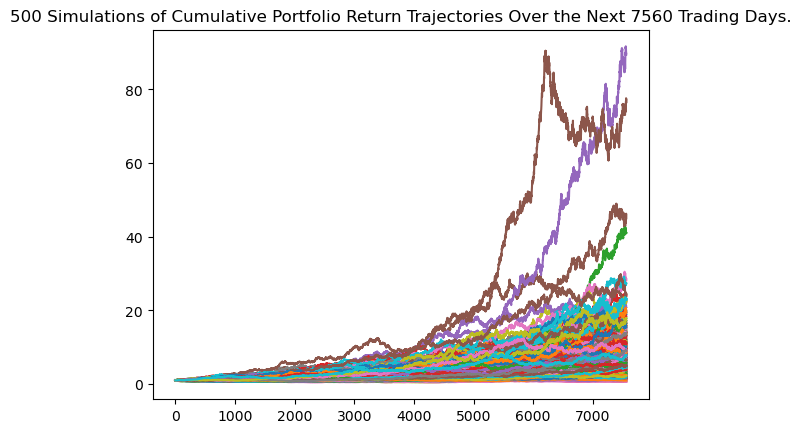

In [25]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

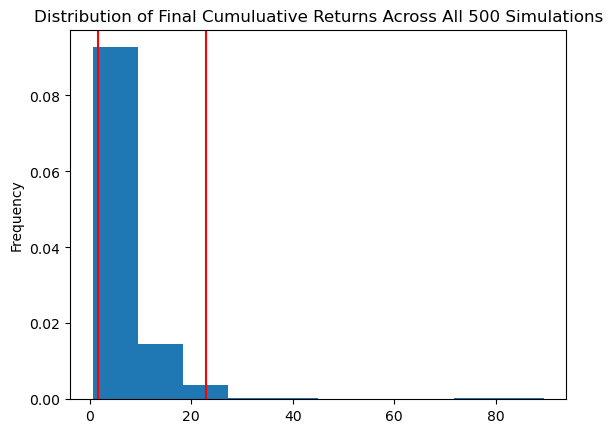

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
analysis = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(analysis)

count           500.000000
mean              6.869830
std               7.152004
min               0.579359
25%               3.246603
50%               5.062962
75%               7.981072
max              89.493204
95% CI Lower      1.515994
95% CI Upper     22.835537
Name: 7560, dtype: float64


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(analysis[8]*20000,2)
ci_upper = round(analysis[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $30319.89 and $456710.73


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(analysis[8]*30000,2)
ci_upper = round(analysis[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $45479.83 and $685066.1


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyear.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2018-06-18 04:00:00+00:00  105.93  105.9300  105.80  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.1100  105.98  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.0600  105.79  105.805  2403650   
2018-06-21 04:00:00+00:00  105.88  105.9599  105.81  105.840  2896731   
2018-06-22 04:00:00+00:00  105.82  105.9400  105.80  105.940  1957177   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-06-18 04:00:00+00:00       10590  105.864382          NaN  275.49   
2018-06-19 04:00:00+00:00       10342  106.041881     0.001039  274.00   
2018-06-20 04:00:00+00:00        9220  105.886127    -0.001934  276.26   
2018-06-21 04:00:00+00:00       11286  105.870603     0.000331  275.96   
2018-06-22 04:00:00+00:00        7830  105.897826     0.000945  275.66   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2018-06-18 04:00:00+00:00  276.700  274.95  276.59  53163695      221103   
2018-06-19 04:00:00+00:00  275.750  273.53  275.48  97669710      337433   
2018-06-20 04:00:00+00:00  276.720  275.59  276.01  54051558      212283   
2018-06-21 04:00:00+00:00  275.980  273.68  274.24  75659252      289344   
2018-06-22 04:00:00+00:00  275.785  274.49  274.76  58532014      231536   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-06-18 04:00:00+00:00  276.151288          NaN  
2018-06-19 04:00:00+00:00  274.931757    -0.004013  
2018-06-20 04:00:00+00:00  276.065730     0.001924  
2018-06-21 04:00:00+00:00  274.618337    -0.006413  
2018-06-22 04:00:00+00:00  275.099940     0.001896

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.986339  1.011981  1.000071  0.982316  0.995642  0.984901  1.013922   
2     0.974496  0.990091  1.015505  0.970260  0.994252  0.993427  1.022853   
3     0.978742  0.987245  1.008315  0.984966  0.982998  0.987942  1.000539   
4     0.987170  0.989479  1.010719  0.980664  0.979328  0.972426  1.001767   
...        ...       ...       ...       ...       ...       ...       ...   
1256  0.948626  1.326392  1.092226  0.787992  0.938567  1.335135  1.343330   
1257  0.936545  1.331473  1.089902  0.784755  0.945473  1.322488  1.329899   
1258  0.936544  1.314508  1.096373  0.785853  0.934190  1.308858  1.338388   
1259  0.942052  1.315031  1.099633  0.783853  0.937994  1.324069  1.355551   
1260  0.954293  1.299140  1.098131  0.791254  0.942562  1.356316  1.375969   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.984463  0.999941  1.002573  ...  1.016267  0.995161  0.999241   
2     0.986343  1.006802  0.997007  ...  1.012425  1.003459  1.003866   
3     0.982139  1.009808  1.006065  ...  0.998763  1.015656  1.007665   
4     0.993912  1.004884  0.991374  ...  0.977368  1.009776  1.013039   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.123507  2.020268  2.605614  ...  0.806209  4.211818  2.240002   
1257  1.122360  2.019903  2.617348  ...  0.808347  4.209850  2.257720   
1258  1.117839  2.021026  2.608213  ...  0.817550  4.177226  2.257727   
1259  1.112127  2.039537  2.603684  ...  0.822399  4.227853  2.255681   
1260  1.132278  2.072096  2.654113  ...  0.825195  4.308001  2.268835   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.007837  0.983458  1.000465  0.986294  0.995482  1.001779  0.994955  
2     1.024848  0.982963  0.991952  0.991363  0.984931  1.000008  0.992180  
3     1.027392  0.983566  0.988237  1.006289  0.984221  1.011535  0.993995  
4     1.018524  0.984260  0.983196  1.029464  0.978232  1.016590  0.978914  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.705682  2.165308  1.601746  1.019217  2.288700  1.826914  1.127088  
1257  1.695287  2.143819  1.591399  1.029001  2.271330  1.810239  1.121533  
1258  1.705785  2.128665  1.581425  1.045251  2.273255  1.814374  1.135772  
1259  1.706183  2.130324  1.568928  1.061604  2.252662  1.821442  1.154944  
1260  1.700200  2.123354  1.543187  1.056919  2.255012  1.826083  1.127885  

[1261 rows x 500 columns]

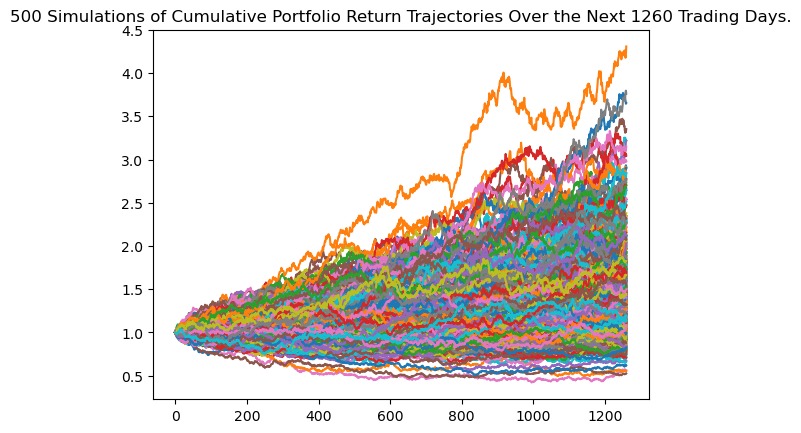

In [32]:
# Plot simulation outcomes
five_year_line_plot = MC_fiveyear.plot_simulation()

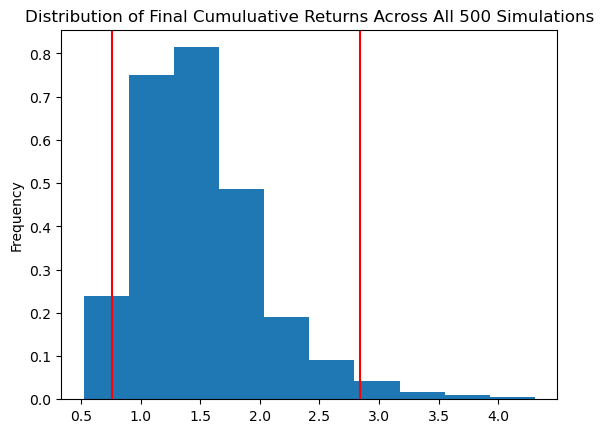

In [33]:
# Plot probability distribution and confidence intervals
fiveyear_dist_plot = MC_fiveyear.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
fiveyear_analysis = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(fiveyear_analysis)

count           500.000000
mean              1.506313
std               0.533366
min               0.525514
25%               1.130420
50%               1.405056
75%               1.772763
max               4.308001
95% CI Lower      0.759197
95% CI Upper      2.841776
Name: 1260, dtype: float64


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [35]:
# Set initial investment
initial_investment = 40000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(fiveyear_analysis[8]*40000,2)
ci_upper_five = round(fiveyear_analysis[9]*40000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 5 years will end within in the range of $30367.88 and $113671.06


### Ten Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_tenyear.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2018-06-18 04:00:00+00:00  105.93  105.9300  105.80  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.1100  105.98  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.0600  105.79  105.805  2403650   
2018-06-21 04:00:00+00:00  105.88  105.9599  105.81  105.840  2896731   
2018-06-22 04:00:00+00:00  105.82  105.9400  105.80  105.940  1957177   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-06-18 04:00:00+00:00       10590  105.864382          NaN  275.49   
2018-06-19 04:00:00+00:00       10342  106.041881     0.001039  274.00   
2018-06-20 04:00:00+00:00        9220  105.886127    -0.001934  276.26   
2018-06-21 04:00:00+00:00       11286  105.870603     0.000331  275.96   
2018-06-22 04:00:00+00:00        7830  105.897826     0.000945  275.66   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2018-06-18 04:00:00+00:00  276.700  274.95  276.59  53163695      221103   
2018-06-19 04:00:00+00:00  275.750  273.53  275.48  97669710      337433   
2018-06-20 04:00:00+00:00  276.720  275.59  276.01  54051558      212283   
2018-06-21 04:00:00+00:00  275.980  273.68  274.24  75659252      289344   
2018-06-22 04:00:00+00:00  275.785  274.49  274.76  58532014      231536   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-06-18 04:00:00+00:00  276.151288          NaN  
2018-06-19 04:00:00+00:00  274.931757    -0.004013  
2018-06-20 04:00:00+00:00  276.065730     0.001924  
2018-06-21 04:00:00+00:00  274.618337    -0.006413  
2018-06-22 04:00:00+00:00  275.099940     0.001896

In [37]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 110.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 120.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 130.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 140.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 150.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 160.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 170.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 180.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 190.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 200.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 210.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 220.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 230.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 240.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 250.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 260.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 270.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 280.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 290.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 300.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 310.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 320.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 330.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 340.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 350.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 360.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 370.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 380.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 390.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 400.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 410.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 420.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 430.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 440.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 450.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 460.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 470.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 480.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

Running Monte Carlo simulation number 490.


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCFor

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.996526  1.003699  0.999194  1.006091  1.007558  1.006105  1.003420   
2     0.996391  1.012357  0.992433  1.010433  1.022170  1.008263  0.996047   
3     0.995536  1.011381  0.984035  1.013619  1.021498  1.002126  0.991021   
4     0.997060  1.018909  0.987932  1.014420  1.020457  1.002600  0.985788   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.886289  2.539766  2.725665  0.927689  1.102735  4.840718  4.805495   
2517  1.904452  2.574370  2.696394  0.925949  1.095610  4.830646  4.818647   
2518  1.921623  2.515141  2.731319  0.929211  1.096937  4.860050  4.831705   
2519  1.926124  2.504401  2.708230  0.919955  1.098646  4.867266  4.881866   
2520  1.958029  2.530082  2.696754  0.899177  1.098605  4.830458  4.864534   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.009495  1.009273  1.012773  ...  1.007358  1.003722  0.976868   
2     1.005736  1.009601  1.006682  ...  1.006859  1.005937  0.980136   
3     0.987005  1.016698  1.011312  ...  0.994125  1.004758  0.976817   
4     0.986767  1.013749  1.024234  ...  0.986514  1.001418  0.974208   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.450106  3.326151  4.570923  ...  2.508486  2.496599  4.218207   
2517  2.465286  3.385379  4.604672  ...  2.541549  2.561031  4.191871   
2518  2.459862  3.384333  4.698434  ...  2.562712  2.598940  4.196834   
2519  2.450478  3.409073  4.663690  ...  2.555218  2.588868  4.211810   
2520  2.431801  3.417083  4.631707  ...  2.538039  2.569343  4.231799   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.014989  1.005141  1.003231  1.007119  1.030093  0.987951  1.018168  
2     1.017483  1.025691  1.000805  0.983732  1.043238  0.974787  1.013266  
3     1.009885  1.009735  1.007957  0.972130  1.060904  0.968973  1.022616  
4     1.002889  0.998304  1.016609  0.967020  1.066753  0.975126  1.033309  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.654232  2.095397  2.925745  2.166120  5.162494  2.849167  2.463206  
2517  1.661612  2.123612  2.847166  2.181496  5.240023  2.839720  2.451380  
2518  1.670105  2.075743  2.827462  2.204369  5.323219  2.848083  2.406802  
2519  1.666122  2.106949  2.837201  2.198762  5.283385  2.782952  2.367879  
2520  1.633326  2.105668  2.889323  2.206614  5.347834  2.773364  2.374228  

[2521 rows x 500 columns]

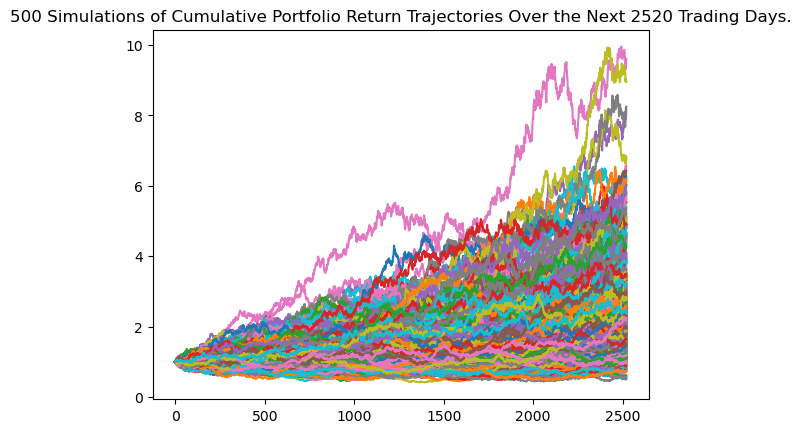

In [38]:
# Plot simulation outcomes
tenyear_line_plot = MC_tenyear.plot_simulation()

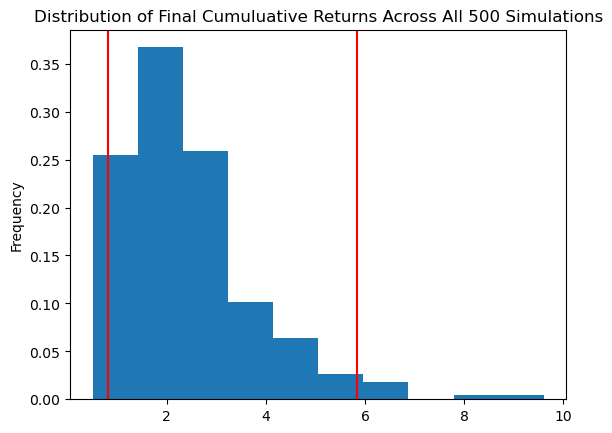

In [39]:
# Plot probability distribution and confidence intervals
tenyear_dist_plot = MC_tenyear.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tenyear_analysis = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tenyear_analysis)

count           500.000000
mean              2.423045
std               1.341286
min               0.509921
25%               1.466168
50%               2.126402
75%               2.956641
max               9.605684
95% CI Lower      0.806239
95% CI Upper      5.837739
Name: 2520, dtype: float64


C:\Users\luihe\Documents\Julian\FinTech\Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [41]:
# Set initial investment
initial_invest = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tenyear_analysis[8]*60000,2)
ci_upper_ten = round(tenyear_analysis[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $48374.32 and $350264.33
